In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/Toronto_rentals.csv')

X = data.iloc[:, :3]  #Bedroom, bathroom, den
y = data.iloc[:, -1].str.replace(r'[^\d.]', '', regex=True).astype('float') #Price

In [ ]:
print(X.iloc[0])
print(f'Price: {y.iloc[0]}')

Bedroom     2.0
Bathroom    2.0
Den         0.0
Name: 0, dtype: float64
Price: 2450.0


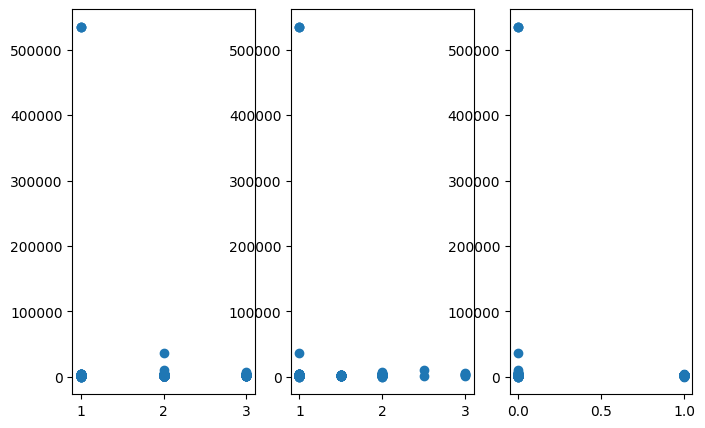

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(8, 5)
for i in range(3):
    axes[i].scatter(X.iloc[:, i], y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
pred_test = model_linear.predict(X_test)
mean_squared_error(y_test, pred_test)

1255848564.0562418

In [ ]:
# Get the coefficients including the bias term
coefficients = model_linear.coef_
bias = model_linear.intercept_

print("Coefficients: ", coefficients)
print("Bias: ", bias)

Coefficients:  [-1205.7424467     28.49940595 -1867.83581879]
Bias:  5283.143746965645


In [ ]:
from sklearn.linear_model import Ridge, Lasso

model_ridge = Ridge(1000)
model_ridge.fit(X_train, y_train)

pred_ridge = model_ridge.predict(X_test)
print(f'MSE for ridge regression: {mean_squared_error(y_test, pred_ridge)}')

model_lasso = Lasso(15)
model_lasso.fit(X_train, y_train)

pred_lasso = model_lasso.predict(X_test)
print(f'MSE for lasso regression: {mean_squared_error(y_test, pred_lasso)}')

MSE for ridge regression: 1257808634.3923385
MSE for lasso regression: 1255975011.5331297


In [ ]:
# Get the coefficients including the bias term
coefficients = model_ridge.coef_
bias = model_ridge.intercept_

print("Coefficients: ", coefficients)
print("Bias: ", bias)

Coefficients:  [-176.81914299  -93.32850082 -148.47437788]
Bias:  3771.387193125925


In [ ]:
# Get the coefficients including the bias term
coefficients = model_lasso.coef_
bias = model_lasso.intercept_

print("Coefficients: ", coefficients)
print("Bias: ", bias)

Coefficients:  [-1113.53090783    -0.         -1714.57361449]
Bias:  5169.541559357949
